In [34]:
import neuralnetwork as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm
import time

plt.style.use('seaborn')

In [2]:
test_df = pd.read_csv('data/mnist_test.csv')
train_df = pd.read_csv('data/mnist_train.csv')

train_values = train_df.values
test_values = test_df.values

In [50]:
# set base parameters
input_nodes = 784
hidden_nodes = 250
output_nodes = 10
learning_rate = 0.1
epochs = 3

In [19]:
def scale(inputs):
    scaled_inputs = (np.asfarray(inputs) / 255.0 * 0.99) + 0.01
    
    return scaled_inputs

def targets(label, output_size):
    targets = np.zeros(output_size) + 0.01
    targets[int(label)] = 0.99
    
    return targets

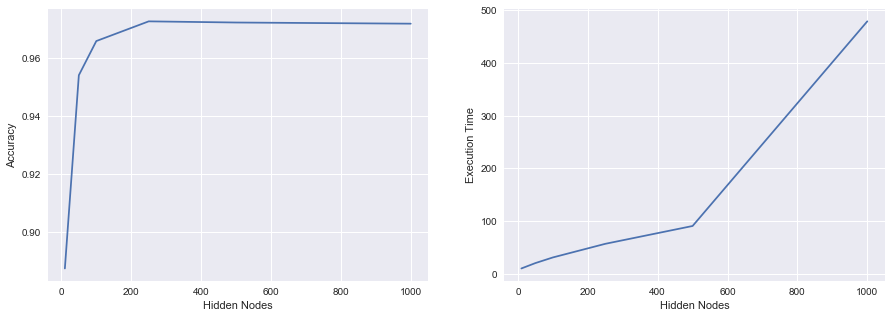

In [51]:
# test performance of different values of hidden notes

test_params = [10, 50, 100, 250, 500, 1000]
test_results = []
execution_time = []

for test_hidden in tqdm(test_params):
    
    start = time.time()
    
    # initialize network
    neural_net = nn.NeuralNetwork(input_nodes, test_hidden, output_nodes, learning_rate)
    
    # train network
    for epoch in range(epochs):
        for record in train_values:
            
            label = record[0]
            inputs = record[1:]
            
            neural_net.train(scale(inputs), targets(label, output_nodes))
    
    end = time.time()
    
    execution_time.append(end - start)
    
    # test accuracy
    
    score = []
    predictions = []
    labels = []
    
    for record in test_values:
        
        label = record[0]
        inputs = record[1:]
        
        # obtain the neural net's prediction
        output = neural_net.query(scale(inputs))
        prediction = np.argmax(output)

        if prediction == label:
            score.append(1)
        else:
            score.append(0)

        predictions.append(prediction)
        labels.append(label)

    score_array = np.asarray(score)
    predictions_array = np.asarray(predictions)
    labels_array = np.asarray(labels)

    # compute the performance
    accuracy = score_array.sum() / score_array.size
    
    
    test_results.append(accuracy)

# plot results
fix, ax = plt.subplots(1, 2, figsize=(15,5))
ax[0].plot(test_params, test_results)
ax[0].set_xlabel("Hidden Nodes")
ax[0].set_ylabel("Accuracy")
ax[1].plot(test_params, execution_time)
ax[1].set_xlabel("Hidden Nodes")
ax[1].set_ylabel("Execution Time")
plt.show();

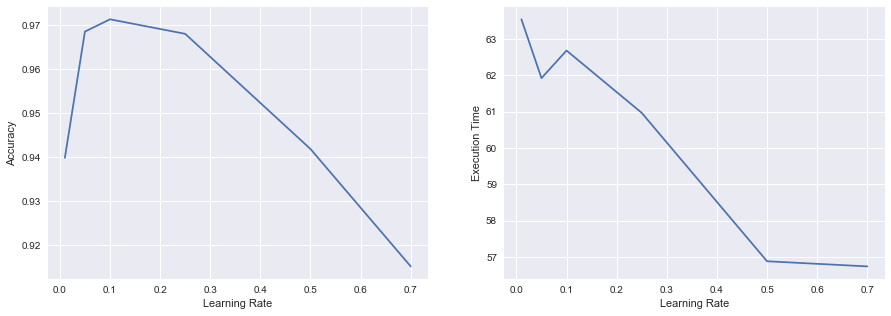

In [52]:
# test performance of different values of learning rate

test_params = [0.01, 0.05, 0.1, 0.25, 0.5, 0.7]
test_results = []
execution_time = []

for test_learning in tqdm(test_params):
    
    start = time.time()
    
    # initialize network
    neural_net = nn.NeuralNetwork(input_nodes, hidden_nodes, output_nodes, test_learning)
    
    # train network
    for epoch in range(epochs):
        for record in train_values:
            
            label = record[0]
            inputs = record[1:]
            
            neural_net.train(scale(inputs), targets(label, output_nodes))
    
    end = time.time()
    
    execution_time.append(end - start)
    
    # test accuracy
    
    score = []
    predictions = []
    labels = []
    
    for record in test_values:
        
        label = record[0]
        inputs = record[1:]
        
        # obtain the neural net's prediction
        output = neural_net.query(scale(inputs))
        prediction = np.argmax(output)

        if prediction == label:
            score.append(1)
        else:
            score.append(0)

        predictions.append(prediction)
        labels.append(label)

    score_array = np.asarray(score)
    predictions_array = np.asarray(predictions)
    labels_array = np.asarray(labels)

    # compute the performance
    accuracy = score_array.sum() / score_array.size
    
    
    test_results.append(accuracy)

# plot results
fix, ax = plt.subplots(1, 2, figsize=(15,5))
ax[0].plot(test_params, test_results)
ax[0].set_xlabel("Learning Rate")
ax[0].set_ylabel("Accuracy")
ax[1].plot(test_params, execution_time)
ax[1].set_xlabel("Learning Rate")
ax[1].set_ylabel("Execution Time")
plt.show();

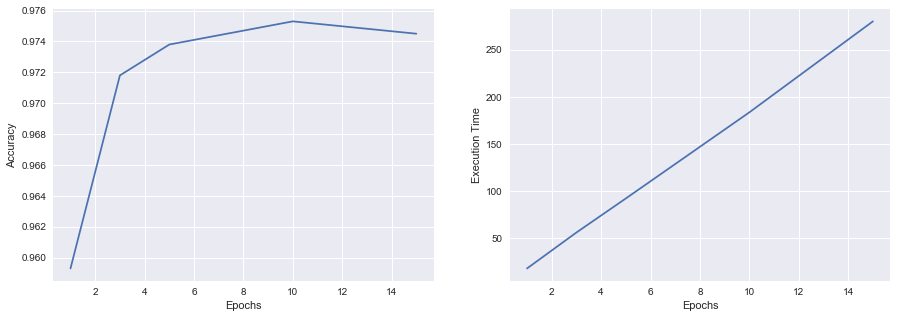

In [53]:
# test performance of different values of hidden notes

test_params = [1, 3, 5, 10, 15]
test_results = []
execution_time = []

for test_epochs in tqdm(test_params):
    
    start = time.time()
    
    # initialize network
    neural_net = nn.NeuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)
    
    # train network
    for epoch in range(test_epochs):
        for record in train_values:
            
            label = record[0]
            inputs = record[1:]
            
            neural_net.train(scale(inputs), targets(label, output_nodes))
    
    end = time.time()
    
    execution_time.append(end - start)
    
    # test accuracy
    
    score = []
    predictions = []
    labels = []
    
    for record in test_values:
        
        label = record[0]
        inputs = record[1:]
        
        # obtain the neural net's prediction
        output = neural_net.query(scale(inputs))
        prediction = np.argmax(output)

        if prediction == label:
            score.append(1)
        else:
            score.append(0)

        predictions.append(prediction)
        labels.append(label)

    score_array = np.asarray(score)
    predictions_array = np.asarray(predictions)
    labels_array = np.asarray(labels)

    # compute the performance
    accuracy = score_array.sum() / score_array.size
    
    
    test_results.append(accuracy)

# plot results
fix, ax = plt.subplots(1, 2, figsize=(15,5))
ax[0].plot(test_params, test_results)
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")
ax[1].plot(test_params, execution_time)
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Execution Time")
plt.show();